In [5]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
                                              0.0/293.3 kB ? eta -:--:--
     -                                        10.2/293.3 kB ? eta -:--:--
     -                                        10.2/293.3 kB ? eta -:--:--
     ---                                   30.7/293.3 kB 217.9 kB/s eta 0:00:02
     -------                               61.4/293.3 kB 326.1 kB/s eta 0:00:01
     -----------------------              194.6/293.3 kB 908.0 kB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.3 MB/s eta 0:00:00


In [6]:
import seaborn as sns

<Axes: xlabel='age'>

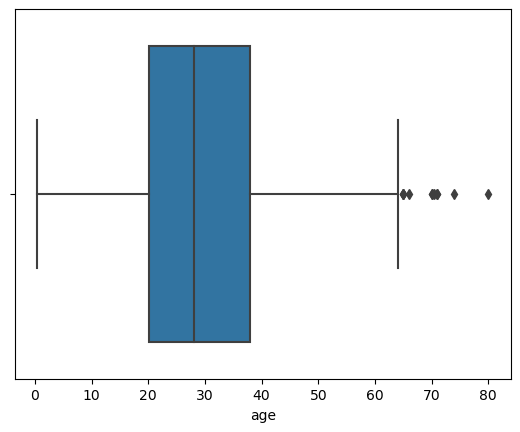

In [8]:
df = sns.load_dataset("titanic")
sns.boxplot(x=df["age"])

In [12]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='class'>

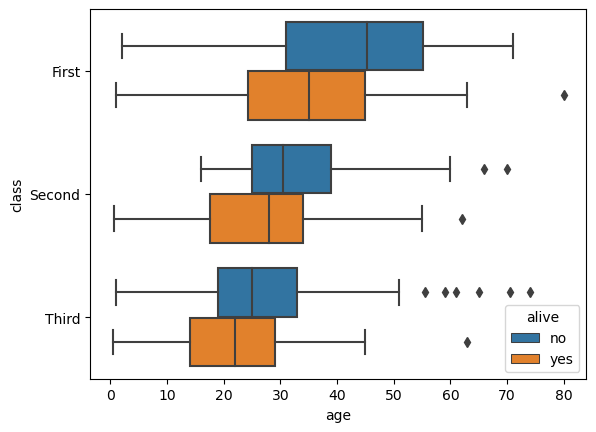

In [11]:
sns.boxplot(data=df, x="age", y="class", hue="alive")

In [2]:
%matplotlib inline

#import ast
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#from matplotlib.dates import YearLocator
#from matplotlib.ticker import ScalarFormatter
#from matplotlib.patches import Patch
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
#import matplotlib.gridspec as gridspec

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
import matplotlib
import seaborn as sns
#from itertools import groupby
#from scipy import integrate
#from tqdm import tqdm
#import cartopy.crs as ccrs
#import cartopy

plt.style.use('ggplot')
#pd.set_option('chained_assignment',None)

#sys.path.append(os.path.join( '..'))
#from gmtra.utils import load_config,sum_tuples,monetary_risk,set_prot_standard,pluvial_design,pluvial_design_1up,gdp_lookup,get_value,get_mean,wbregion
data_path = os.path.join('C:\\','Data','pg_risk_analysis')
tc_path = os.path.join(data_path,'tc_netcdf')
fl_path = os.path.join(data_path,'GLOFRIS')
osm_data_path = os.path.join('C:\\','Data','country_osm')
pg_data_path = os.path.join(data_path,'pg_data')
vul_curve_path = os.path.join(data_path,'vulnerability_curves','input_vulnerability_data.xlsx')
output_path = os.path.join('C:\\','projects','pg_risk_analysis','output')
ne_path = os.path.join(data_path,'..',"natural_earth","ne_10m_admin_0_countries.shp")
figure_path = os.path.join('C:\\','projects','pg_risk_analysis','figures')
#data_path = load_config()['paths']['data']
#figure_path = load_config()['paths']['figures']


In [ ]:
wbccodes = pd.read_csv(os.path.join(data_path,'input_data','wbccodes2014.csv'),index_col=[0])
wbc_lookup = dict(zip(wbccodes.index,wbccodes.wbregion))

In [16]:
import os
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# set the directory containing the excel files
excel_path = os.path.join(output_path,'risk')

# initialize an empty dataframe to store the concatenated data
df = pd.DataFrame()

# loop over each excel file in the excel_path
for filename in os.listdir(excel_path):
    country_code, infra_type, hazard_type = filename[:-5].split('_')[:3]
    if hazard_type == 'fl': 
        # read the excel file into a dictionary of dataframes (one for each sheet)
        sheets = pd.read_excel(os.path.join(excel_path, filename), sheet_name=None)
        
        for sheet_name, sheet_data in sheets.items():
            if len(sheet_data) == 0:
                df = df
            else:    
                #print(sheet_data.iloc[0,0])
                # parse the asset_type from the sheet name
                asset_type = sheet_name[:-5].split('_')[0]
                count_col = sheet_data.shape[1] #number of columns
                
                if count_col == 3:
                    index = ['1','2','3','4','5','6']
                    
                    risk_value_1 = pd.DataFrame({'risk_type':sheet_data.iloc[0,0],'risk_value':sheet_data.iloc[0,1],
                                                 'climate_model':sheet_data.columns[1],'asset_type':asset_type,'country_code':country_code,
                                                 'infra_type':infra_type,'hazard_type':hazard_type},index=index)

                    risk_value_2 = pd.DataFrame({'risk_type':sheet_data.iloc[0,0],'risk_value':sheet_data.iloc[0,2],
                                                 'climate_model':sheet_data.columns[2],'asset_type':asset_type,'country_code':country_code,
                                                 'infra_type':infra_type,'hazard_type':hazard_type},index=index)

                    risk_value_3 = pd.DataFrame({'risk_type':sheet_data.iloc[1,0],'risk_value':sheet_data.iloc[1,1],
                                                 'climate_model':sheet_data.columns[1],'asset_type':asset_type,'country_code':country_code,
                                                 'infra_type':infra_type,'hazard_type':hazard_type},index=index)

                    risk_value_4 = pd.DataFrame({'risk_type':sheet_data.iloc[1,0],'risk_value':sheet_data.iloc[1,2],
                                                 'climate_model':sheet_data.columns[2],'asset_type':asset_type,'country_code':country_code,
                                                 'infra_type':infra_type,'hazard_type':hazard_type},index=index)

                    risk_value_5 = pd.DataFrame({'risk_type':sheet_data.iloc[2,0],'risk_value':sheet_data.iloc[1,2],
                                                 'climate_model':sheet_data.columns[1],'asset_type':asset_type,'country_code':country_code,
                                                 'infra_type':infra_type,'hazard_type':hazard_type},index=index)

                    risk_value_6 = pd.DataFrame({'risk_type':sheet_data.iloc[2,0],'risk_value':sheet_data.iloc[2,2],
                                                 'climate_model':sheet_data.columns[1],'asset_type':asset_type,'country_code':country_code,
                                                 'infra_type':infra_type,'hazard_type':hazard_type},index=index)
                    # Concatenate stacked data to master data frame
                    #df = pd.concat([df,risk_value_1,risk_value_2,risk_value_3,risk_value_4,risk_value_5,
                    #               risk_value_6]).reset_index(drop=True)
                    df = df.append([risk_value_1,risk_value_2,risk_value_3,risk_value_4,risk_value_5,
                                   risk_value_6]).reset_index(drop=True)
                
                elif count_col == 2:
                    index = ['1','2','3']
                    
                    risk_value_1 = pd.DataFrame({'risk_type':sheet_data.iloc[0,0],'risk_value':sheet_data.iloc[0,1],
                                                 'climate_model':sheet_data.columns[1],'asset_type':asset_type,'country_code':country_code,
                                                 'infra_type':infra_type,'hazard_type':hazard_type},index=index)

                    risk_value_2 = pd.DataFrame({'risk_type':sheet_data.iloc[1,0],'risk_value':sheet_data.iloc[1,1],
                                                 'climate_model':sheet_data.columns[1],'asset_type':asset_type,'country_code':country_code,
                                                 'infra_type':infra_type,'hazard_type':hazard_type},index=index)

                    risk_value_3 = pd.DataFrame({'risk_type':sheet_data.iloc[2,0],'risk_value':sheet_data.iloc[2,1],
                                                 'climate_model':sheet_data.columns[1],'asset_type':asset_type,'country_code':country_code,
                                                 'infra_type':infra_type,'hazard_type':hazard_type},index=index)

                    # Concatenate stacked data to master data frame
                    #f = pd.concat([df,risk_value_1,risk_value_2,risk_value_3]).reset_index(drop=True)
                    df = df.append([risk_value_1,risk_value_2,risk_value_3]).reset_index(drop=True)
                    
# reorder the columns
df# = df[['risk_value', 'risk_type', 'climate_model', 'asset_type', 'country_code', 'infra_type', 'hazard_type']]


,risk_type,risk_value,climate_model,asset_type,country_code,infra_type,hazard_type
0,mean_risk,2.832946e+06,historical,line,CHN,osm,fl
1,mean_risk,2.832946e+06,historical,line,CHN,osm,fl
2,mean_risk,2.832946e+06,historical,line,CHN,osm,fl
3,mean_risk,2.832946e+06,historical,line,CHN,osm,fl
4,mean_risk,2.832946e+06,historical,line,CHN,osm,fl
...,...,...,...,...,...,...,...
1588,upper_risk,1.225263e+06,historical,tower,VNM,osm,fl
1589,upper_risk,1.225263e+06,historical,tower,VNM,osm,fl
1590,upper_risk,1.225263e+06,historical,tower,VNM,osm,fl
1591,upper_risk,1.225263e+06,historical,tower,VNM,osm,fl


In [261]:
#df = pd.DataFrame()
df = pd.DataFrame(columns=['risk_type','risk_value','hazard_type','climate_model','infra_type','asset_type','country_code'])
# loop over each excel file in the excel_path
for filename in os.listdir(excel_path):
    country_code, infra_type, hazard_type = filename[:-5].split('_')[:3]

    if hazard_type == 'fl':        
        
        # read the excel file into a dictionary of dataframes (one for each sheet)
        sheets = pd.read_excel(os.path.join(excel_path, filename), sheet_name=None)

        # loop over each sheet in the dictionary
        for sheet_name, sheet_data in sheets.items():
            # parse the asset_type from the sheet name
            asset_type = sheet_name[:-5].split('_')[0]
            
            count_row = sheet_data.shape[0] #number of rows
            count_col = sheet_data.shape[1] #number of columns
            
            if len(sheet_data) == 0:
                df = df
            else:
                if count_col == 2:
                    df.append([sheet_data.iloc[0,1],sheet_data.iloc[0,0],hazard_type,sheet_data.columns[1],infra_type,asset_type,country_code]).reset_index(drop=True)
                    
                elif count_col == 3:
                    df = df.append([sheet_data.iloc[0,1],sheet_data.iloc[0,0],hazard_type,sheet_data.columns[1],infra_type,asset_type,country_code]).reset_index(drop=True)
                
                    df.append({'risk_value':data.iloc[0,0],'risk_type':data.iloc[0,1],'climate_model':data.columns[1]},ignore_index=True)
                
                risk_types = ['mean_risk','lower_risk','upper_risk']
                climate_models = ['historical','rcp8p5']
                for risk_type in risk_types:
                    for climate_model in climate_models:
                        risk_value = df.loc['lower_risk', 'rcp8p5']
                        risk_type = 'lower_risk'
                        climate_model = 'rcp8p5'

                        new_df = pd.DataFrame({
                            'risk_value': [risk_value],
                            'risk_type': [risk_type],
                            'climate_model': [climate_model]
                        })

                if count_col == 2:
                    df = df.append([sheet_data.iloc[0,1],sheet_data.iloc[0,0],hazard_type,sheet_data.columns[1],infra_type,asset_type,country_code]).reset_index(drop=True)
                    
                elif count_col == 3:
                    df = df.append([sheet_data.iloc[0,1],sheet_data.iloc[0,0],hazard_type,sheet_data.columns[1],infra_type,asset_type,country_code]).reset_index(drop=True)
                #df = pd.DataFrame('risk_value','risk_type','hazard_type','climate_model','infra_type','asset_type','country_code')
                #print(len(sheet_data.index))
                #df_row = pd.DataFrame([sheet_data.iloc[0,1],sheet_data.iloc[0,0],hazard_type,sheet_data.columns[1],infra_type,asset_type,country_code],columns=df.columns)
                #df = pd.concat([df_row,df]).reset_index(drop=True)
                #df.append([sheet_data.iloc[0,1],sheet_data.iloc[0,0],hazard_type,sheet_data.columns[1],infra_type,asset_type,country_code])
                #new_row = pd.DataFrame({'Courses':'Hyperion', 'Fee':24000, 'Duration':'55days', 'Discount':1800}, index=[0])
                #df2 = pd.concat([new_row,df.loc[:]]).reset_index(drop=True)
                """
                # stack the sheet data to create a long-format dataframe
                stacked_data = sheet_data.stack().reset_index()

                # rename the columns
                stacked_data.columns = ['risk_type', 'climate_model', 'risk_value']

                # add additional columns
                stacked_data['country_code'] = country_code
                stacked_data['infra_type'] = infra_type
                stacked_data['hazard_type'] = hazard_type
                stacked_data['asset_type'] = asset_type
                """

                # Concatenate stacked data to master data frame
                #df = pd.concat([df, stacked_data], ignore_index=True)    

# reorder the columns
#df = df[['risk_value', 'risk_type', 'climate_model', 'asset_type', 'country_code', 'infra_type', 'hazard_type']]


AttributeError: 'list' object has no attribute 'iloc'

In [116]:
import pandas as pd
import numpy as np

df = pd.read_excel('your_file_name.xlsx', sheet_name='your_sheet_name')

risk_value = df.loc['lower_risk', 'rcp8p5']
risk_type = 'lower_risk'
climate_model = 'rcp8p5'

new_df = pd.DataFrame({
    'risk_value': [risk_value],
    'risk_type': [risk_type],
    'climate_model': [climate_model]
})


,risk_value,risk_type,hazard_type,climate_model,infra_type,asset_type,country_code,0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2832945.580319
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mean_risk
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,historical
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,osm
...,...,...,...,...,...,...,...,...
310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,historical
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,osm
313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tower


In [205]:
import pandas as pd

file = os.path.join(excel_path, 'CHN_osm_fl_risk.xlsx')
data = pd.read_excel(file, 'line_risk') 
data

,Unnamed: 0,historical,rcp8p5
0,mean_risk,2.832946e+06,3.317906e+06
1,lower_risk,1.849665e+06,2.175858e+06
2,upper_risk,4.250451e+06,4.953426e+06


In [206]:
#data.columns[1]
#data.columns[2]
data.iloc[0,0]

'mean_risk'

In [178]:
df = pd.DataFrame(columns=['risk_value','risk_type','climate_model'])
df

,risk_value,risk_type,climate_model


In [186]:
#concat_row = {'risk_value':data.iloc[0,0],'risk_type':data.iloc[0,1],'climate_model':data.columns[1]}
df=df.append({'risk_value':data.iloc[0,0],'risk_type':data.iloc[0,1],'climate_model':data.columns[1]},ignore_index=True)
df=df.append({'risk_value':data.iloc[0,0],'risk_type':data.iloc[0,1],'climate_model':data.columns[2]},ignore_index=True)

#[data.iloc[0,0], data.iloc[0,1],data.columns[1]]

In [187]:
df

,risk_value,risk_type,climate_model
0,mean_risk,2.832946e+06,historical
1,mean_risk,2.832946e+06,rcp8p5
2,mean_risk,2.832946e+06,historical
3,mean_risk,2.832946e+06,rcp8p5


In [230]:
# Load the Excel sheets into a dictionary of dataframes
file = os.path.join(excel_path, 'CHN_osm_fl_risk.xlsx')
dfs = pd.read_excel(file, sheet_name=None)

# Extract the data from the second column and second row of each sheet
data = []
for sheet_name, df in dfs.items():
    count_row = df.shape[0] #number of rows
    count_col = df.shape[1] #number of columns
    
    #for (colname,colval) in df.iteritems():
    for i,j in df.iteritems:
        #for i,(index,row) in enumerate(df.iterrows()):
        #if i == 0: continue # skip first row
        #else:
        risk_type = df.iloc[index,df[colname]]
        #climate_model = df.columns[colname].values
        risk_value = df.iloc[1, 1]
        asset_type = sheet_name[:-5].split('_')[0]
        data.append({'risk_type': risk_type, 'climate_model': climate_model, 'risk_value': risk_value})

        #elif count_col == 3:
         #   for i in df.index:
"""
                risk_type = df.iloc[(i),0]
                climate_model = 
                risk_value = df.iloc[1, 1]
                asset_type = sheet_name[:-5].split('_')[0]
                data.append({'risk_type': risk_type, 'climate_model': climate_model, 'risk_value': risk_value})
"""
# Create a new dataframe from the extracted data
df_new = pd.DataFrame(data)


IndexError: .iloc requires numeric indexers, got ['mean_risk' 'lower_risk' 'upper_risk']

In [260]:
for (colname,colval) in df.iteritems():
    print(colval[0][1:])
    #climate_model = df.columns[colname].values
    #risk_value = df.iloc[1, 1]
    #asset_type = sheet_name[:-5].split('_')[0]

ean_risk


IndexError: invalid index to scalar variable.

In [246]:
df

,Unnamed: 0,historical,rcp8p5
0,mean_risk,2.832946e+06,3.317906e+06
1,lower_risk,1.849665e+06,2.175858e+06
2,upper_risk,4.250451e+06,4.953426e+06


In [274]:
# Load the Excel sheets into a dictionary of dataframes
file = os.path.join(excel_path, 'CHN_osm_fl_risk.xlsx')
country_code, infra_type, hazard_type = filename[:-5].split('_')[:3]
dfs = pd.read_excel(file, sheet_name=None)

data = pd.DataFrame()
for sheet_name, df in dfs.items():
    asset_type = sheet_name[:-5].split('_')[0]
    count_col = df.shape[1]
    
    if count_col == 3:
        risk_value_1 = {}
            
            print(risk_type)
            climate_model = df.columns[j+1]
            risk_value = df.iloc[i, j+1]
            data.append([risk_value,risk_type,climate_model])
            #data.append({'risk_type': risk_type, 'climate_model': climate_model, 'risk_value': risk_value})

upper_risk
upper_risk
upper_risk
upper_risk
upper_risk
upper_risk
upper_risk
upper_risk
upper_risk
upper_risk


In [272]:
data

""


In [279]:
df.columns[1:][0]

'historical'